## This notebook I am finding Mutual Information gain on Regression




In [1]:
## I am doing Label encoding using LabelEcoder
## Then scaling all value usign StandardScaler


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest


In [3]:
df = pd.read_csv('./datasets/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
## Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

In [6]:
label_encode = LabelEncoder()
df['mainroad'] = label_encode.fit_transform(df['mainroad'])
df['guestroom'] = label_encode.fit_transform(df['guestroom'])


df['basement'] = label_encode.fit_transform(df['basement'])
df['hotwaterheating'] = label_encode.fit_transform(df['hotwaterheating'])
df['prefarea'] = label_encode.fit_transform(df['prefarea'])
df['airconditioning'] = label_encode.fit_transform(df['airconditioning'])

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [8]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [9]:
df['furnishingstatus'] = label_encode.fit_transform(df['furnishingstatus'])

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [12]:
## Now our all values are int type

In [13]:
# We are standardizing area column
from sklearn.preprocessing import StandardScaler


In [14]:
# splitting to train and test data 
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop('price',axis=1)
Y = df['price']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)

In [17]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
166,7800,3,1,1,1,0,1,0,1,2,1,2
378,2275,3,1,3,1,0,0,1,1,0,1,1
349,4820,3,1,2,1,0,0,0,0,0,0,1
368,5640,2,1,1,0,0,0,0,0,0,0,1
306,4840,3,1,2,1,0,0,0,0,1,0,1


In [18]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
166,7800,3,1,1,1,0,1,0,1,2,1,2
378,2275,3,1,3,1,0,0,1,1,0,1,1
349,4820,3,1,2,1,0,0,0,0,0,0,1
368,5640,2,1,1,0,0,0,0,0,0,0,1
306,4840,3,1,2,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
299,7000,3,1,1,1,0,0,0,0,3,0,0
534,3000,4,1,2,1,0,0,0,0,0,0,2
493,3960,3,1,1,1,0,0,0,0,0,0,0
527,1836,2,1,1,0,0,1,0,0,0,0,1


In [19]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train_scaled

array([[ 1.29270287,  0.04395516, -0.57480379, ...,  1.56399976,
         1.82470421,  1.24281193],
       [-1.35388033,  0.04395516, -0.57480379, ..., -0.79593651,
         1.82470421, -0.08727612],
       [-0.13477549,  0.04395516, -0.57480379, ..., -0.79593651,
        -0.54803403, -0.08727612],
       ...,
       [-0.54673233,  0.04395516, -0.57480379, ..., -0.79593651,
        -0.54803403, -1.41736416],
       [-1.56416993, -1.35162115, -0.57480379, ..., -0.79593651,
        -0.54803403, -0.08727612],
       [-0.40302646,  1.43953147, -0.57480379, ..., -0.79593651,
        -0.54803403, -1.41736416]])

In [20]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
166,7800,3,1,1,1,0,1,0,1,2,1,2
378,2275,3,1,3,1,0,0,1,1,0,1,1
349,4820,3,1,2,1,0,0,0,0,0,0,1
368,5640,2,1,1,0,0,0,0,0,0,0,1
306,4840,3,1,2,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
299,7000,3,1,1,1,0,0,0,0,3,0,0
534,3000,4,1,2,1,0,0,0,0,0,0,2
493,3960,3,1,1,1,0,0,0,0,0,0,0
527,1836,2,1,1,0,0,1,0,0,0,0,1


In [21]:
df_new = pd.DataFrame(X_train_scaled,columns=X_train.columns)
df_new

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.292703,0.043955,-0.574804,-0.927764,0.41510,-0.474426,1.297343,-0.209370,1.439646,1.564000,1.824704,1.242812
1,-1.353880,0.043955,-0.574804,1.316541,0.41510,-0.474426,-0.770806,4.776243,1.439646,-0.795937,1.824704,-0.087276
2,-0.134775,0.043955,-0.574804,0.194389,0.41510,-0.474426,-0.770806,-0.209370,-0.694615,-0.795937,-0.548034,-0.087276
3,0.258021,-1.351621,-0.574804,-0.927764,-2.40906,-0.474426,-0.770806,-0.209370,-0.694615,-0.795937,-0.548034,-0.087276
4,-0.125195,0.043955,-0.574804,0.194389,0.41510,-0.474426,-0.770806,-0.209370,-0.694615,0.384032,-0.548034,-0.087276
...,...,...,...,...,...,...,...,...,...,...,...,...
376,0.909487,0.043955,-0.574804,-0.927764,0.41510,-0.474426,-0.770806,-0.209370,-0.694615,2.743968,-0.548034,-1.417364
377,-1.006591,1.439531,-0.574804,0.194389,0.41510,-0.474426,-0.770806,-0.209370,-0.694615,-0.795937,-0.548034,1.242812
378,-0.546732,0.043955,-0.574804,-0.927764,0.41510,-0.474426,-0.770806,-0.209370,-0.694615,-0.795937,-0.548034,-1.417364
379,-1.564170,-1.351621,-0.574804,-0.927764,-2.40906,-0.474426,1.297343,-0.209370,-0.694615,-0.795937,-0.548034,-0.087276


In [22]:
X_train = df_new
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.292703,0.043955,-0.574804,-0.927764,0.41510,-0.474426,1.297343,-0.209370,1.439646,1.564000,1.824704,1.242812
1,-1.353880,0.043955,-0.574804,1.316541,0.41510,-0.474426,-0.770806,4.776243,1.439646,-0.795937,1.824704,-0.087276
2,-0.134775,0.043955,-0.574804,0.194389,0.41510,-0.474426,-0.770806,-0.209370,-0.694615,-0.795937,-0.548034,-0.087276
3,0.258021,-1.351621,-0.574804,-0.927764,-2.40906,-0.474426,-0.770806,-0.209370,-0.694615,-0.795937,-0.548034,-0.087276
4,-0.125195,0.043955,-0.574804,0.194389,0.41510,-0.474426,-0.770806,-0.209370,-0.694615,0.384032,-0.548034,-0.087276
...,...,...,...,...,...,...,...,...,...,...,...,...
376,0.909487,0.043955,-0.574804,-0.927764,0.41510,-0.474426,-0.770806,-0.209370,-0.694615,2.743968,-0.548034,-1.417364
377,-1.006591,1.439531,-0.574804,0.194389,0.41510,-0.474426,-0.770806,-0.209370,-0.694615,-0.795937,-0.548034,1.242812
378,-0.546732,0.043955,-0.574804,-0.927764,0.41510,-0.474426,-0.770806,-0.209370,-0.694615,-0.795937,-0.548034,-1.417364
379,-1.564170,-1.351621,-0.574804,-0.927764,-2.40906,-0.474426,1.297343,-0.209370,-0.694615,-0.795937,-0.548034,-0.087276


In [23]:
## Now we are doing mutial information gain

In [24]:
mutual_info = mutual_info_regression(X_train,Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns

In [25]:
mutual_info.sort_values(ascending=False)

area                0.283787
stories             0.149627
bathrooms           0.132236
parking             0.122891
airconditioning     0.115761
guestroom           0.111866
furnishingstatus    0.087811
prefarea            0.077975
bedrooms            0.073090
mainroad            0.067533
basement            0.049367
hotwaterheating     0.000000
dtype: float64

<AxesSubplot:>

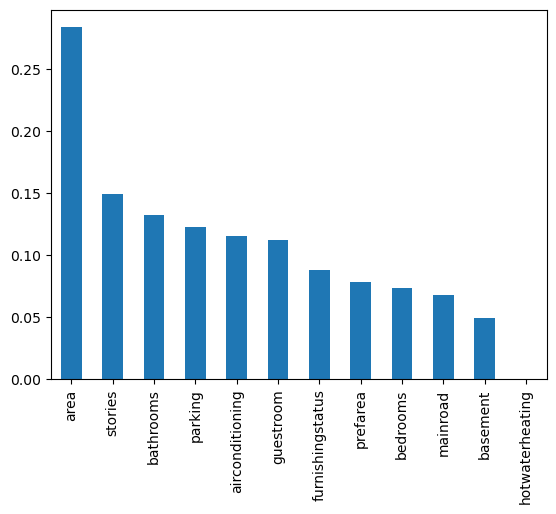

In [26]:
mutual_info.sort_values(ascending=False).plot.bar()

In [27]:
mutual_info.info()

<class 'pandas.core.series.Series'>
Index: 12 entries, area to furnishingstatus
Series name: None
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 492.0+ bytes


In [28]:
## We are finding best 5 Mutual information gain

In [29]:
best_five = SelectKBest(mutual_info_regression,k=5)
best_five.fit(X_train,Y_train)

SelectKBest(k=5, score_func=<function mutual_info_regression at 0x7f550e866160>)

In [30]:
best_five.get_support()

array([ True, False,  True,  True, False,  True, False, False,  True,
       False, False, False])

In [31]:
X_train.columns[best_five.get_support()]

Index(['area', 'bathrooms', 'stories', 'guestroom', 'airconditioning'], dtype='object')